In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_titanic= pd.read_csv("data/titanic.csv")

In [15]:
from scipy.stats import f_oneway

In [16]:
def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):

    """
    Identifica variables categóricas que tienen una relación significativa con una variable
    numérica continua usando ANOVA de una vía. Opcionalmente, genera histogramas agrupados.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con los datos.

    target_col : str
        Nombre de la columna numérica continua a predecir.

    columns : list of str, opcional
        Columnas categóricas a evaluar. Si está vacío, se detectan automáticamente.

    pvalue : float, opcional
        Umbral de significancia (por defecto 0.05).

    with_individual_plot : bool, opcional
        Si es True, se grafican los histogramas por categoría.

    Retorna
    -------
    list of str
    Columnas categóricas significativamente relacionadas con la variable objetivo.

    """
    
    # Validación de DataFrame
    if not isinstance(df, pd.DataFrame):
        print("Error: df debe ser un DataFrame.")
        return None
    
    # Validación de target_col
    if not target_col or target_col not in df.columns:
        print("Error: target_col no está en el DataFrame o es vacío.")
        return None
    
    # Validación de tipo de target_col
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print("Error: target_col debe ser una variable numérica continua.")
        return None

    # Validación de columns
    if not isinstance(columns, list):
        print("Error: columns debe ser una lista de strings.")
        return None
    
    # Si columns está vacío, seleccionamos categóricas automáticamente
    if not columns:
        columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    columnas_significativas = []

    for col in columns:
        if col not in df.columns:
            print(f"Aviso: La columna '{col}' no está en el DataFrame. Se omite.")
            continue

        if df[col].nunique() <= 1:
            continue  

        try:
            grupos = [df[df[col] == cat][target_col].dropna() for cat in df[col].dropna().unique()]
            if any(len(g) == 0 for g in grupos):
                continue

            f_stat, p_val = f_oneway(*grupos)

            if p_val < pvalue:
                columnas_significativas.append(col)

                if with_individual_plot:
                    plt.figure(figsize=(8, 4))
                    sns.histplot(data=df, x=target_col, hue=col, multiple="stack", kde=False)
                    plt.title(f"{col} vs {target_col} (p = {p_val:.4f})")
                    plt.tight_layout()
                    plt.show()

        except Exception as e:
            print(f"Error evaluando la columna '{col}': {e}")

    return columnas_significativas

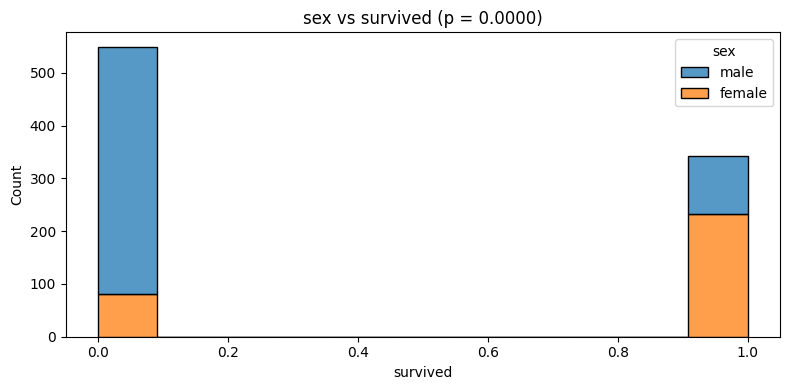

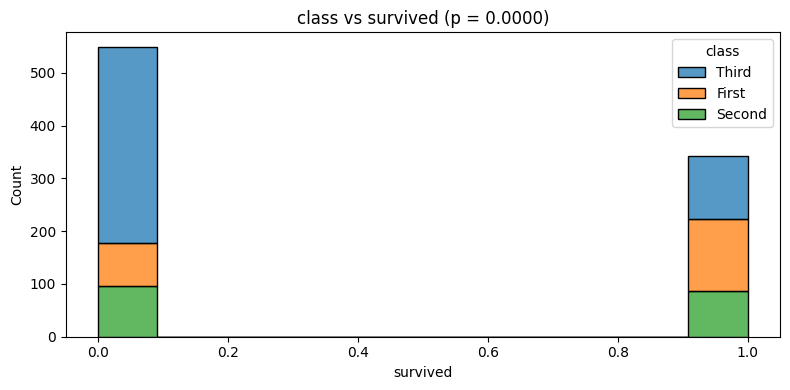

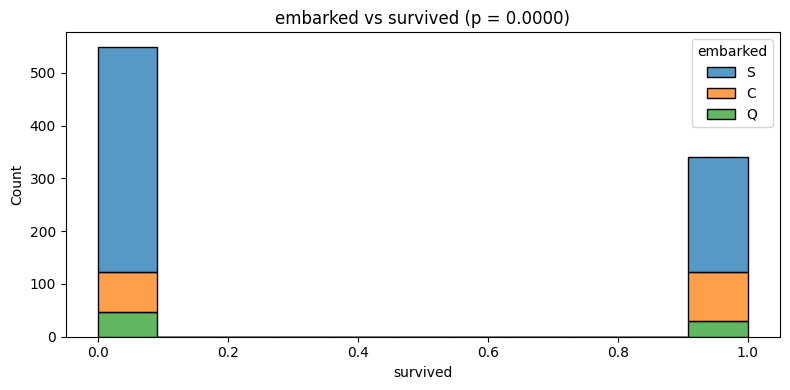

['sex', 'class', 'embarked']

In [17]:
plot_features_cat_regression(df=df_titanic,target_col="survived",columns=["sex", "class", "embarked"],pvalue=0.05,with_individual_plot=True)